<a href="https://colab.research.google.com/github/Ramyrahmeni/DataMining/blob/main/TP1_VE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5830723%2F9566759%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241007%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241007T190106Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D31c083d6492c9bddbc41b9e624d75c8b718f65ba1ebd7e6e1cf8df28ca7e65ae66a03b01927daf84be831289bab981a49a88317ab1c35414be47f96d12b2b553a9745bcf293244408a3004c9c5981a764ea6e884142b4f2f7e5466f5f4030537909b4bdd639ff2cebe8aed99a2867253f9fb61cab28aa5a85180103f61e3cd31aa86f480bd12cd91b1340a909d40c53cfee825acd045f68b2016dfcfc4b8685bc9c925c79204306d3347821bf2c51488d1f79af5265412b53f6a13512929b1038259a4222437d901b71b63b6fa92f1ce891bd31d95364d7384034fa0960869b292347da06ca166fae9067e311250bed4193860aeb4ed6bea49632ddc8d53febf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


<table>
    <tr>
        <td style='width:10%;'>
            <img src='img/intro-to-programming.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 22px;font-weight: 600;line-height: 24px;'>
                Lab 1 : Préparation de données
            </div>
            <span>visualisation de données, Imputation des valeurs manquantes.</span>
        </td>
        <td ></td>
    </tr>
</table>

<div style='font-family:Inter,sans-serif;font-size: 14px;font-weight: 600;line-height: 24px;'>
Importer les bibliothèques:</br></div>
1. Pandas pour la manipulation et l'analyse des données</br>
2. Numpy pour manipuler des matrices ou tableaux multidimensionnels</br>
3. matplotlib pour tracer et visualiser des données sous forme de graphiques</br>
4. seaborn pour la visualisation</br></br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

<div style='font-family:Inter,sans-serif;font-size: 14px;font-weight: 600;line-height: 24px;'>
Importer le jeu de données Titanic:</br></div>
1. Afficher les 5 premières ligne du jeu de données</br>
2. Afficher les dimension de la DataFrame</br>
3. Vérifier le type de chaque colonne</br>
4. afficher les noms des colonnes de la DataFrame</br></br>


In [ ]:
#importer et lire un fichier, ici de type csv
df=pd.read_csv('/kaggle/input/titanic/titanic.csv')

In [ ]:
#afficher un aperçu, par défaut les 5 premières lignes du jeu de données.
df[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
# afficher la dimension d'un dataframe
print("Dimensions:", df.shape)

Dimensions: (1309, 11)


In [ ]:
# Affichage du type de chaque colonne
for i in df.columns:
  print(df[i].dtype)

int64
int64
object
object
float64
int64
int64
object
float64
object
object


In [ ]:
# déterminer le nombre d'occurrences de chaque modalité d'une variable, ici la variable cible
occurrences_survived = df['survived'].value_counts()
print("Occurrences de la variable 'survived':\n", occurrences_survived)

Occurrences de la variable 'survived':
 survived
0    809
1    500
Name: count, dtype: int64


### VARIABLE DESCRIPTIONS
Pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) ;
survival : Survival (0 = No; 1 = Yes);
name : Name ;
sex : Sex;
age : Age;
sibsp : Number of Siblings/Spouses Aboard;
parch : Number of Parents/Children Aboard;
ticket : Ticket Number;
fare : Passenger Fare (British pound);
cabin : Cabin;
embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

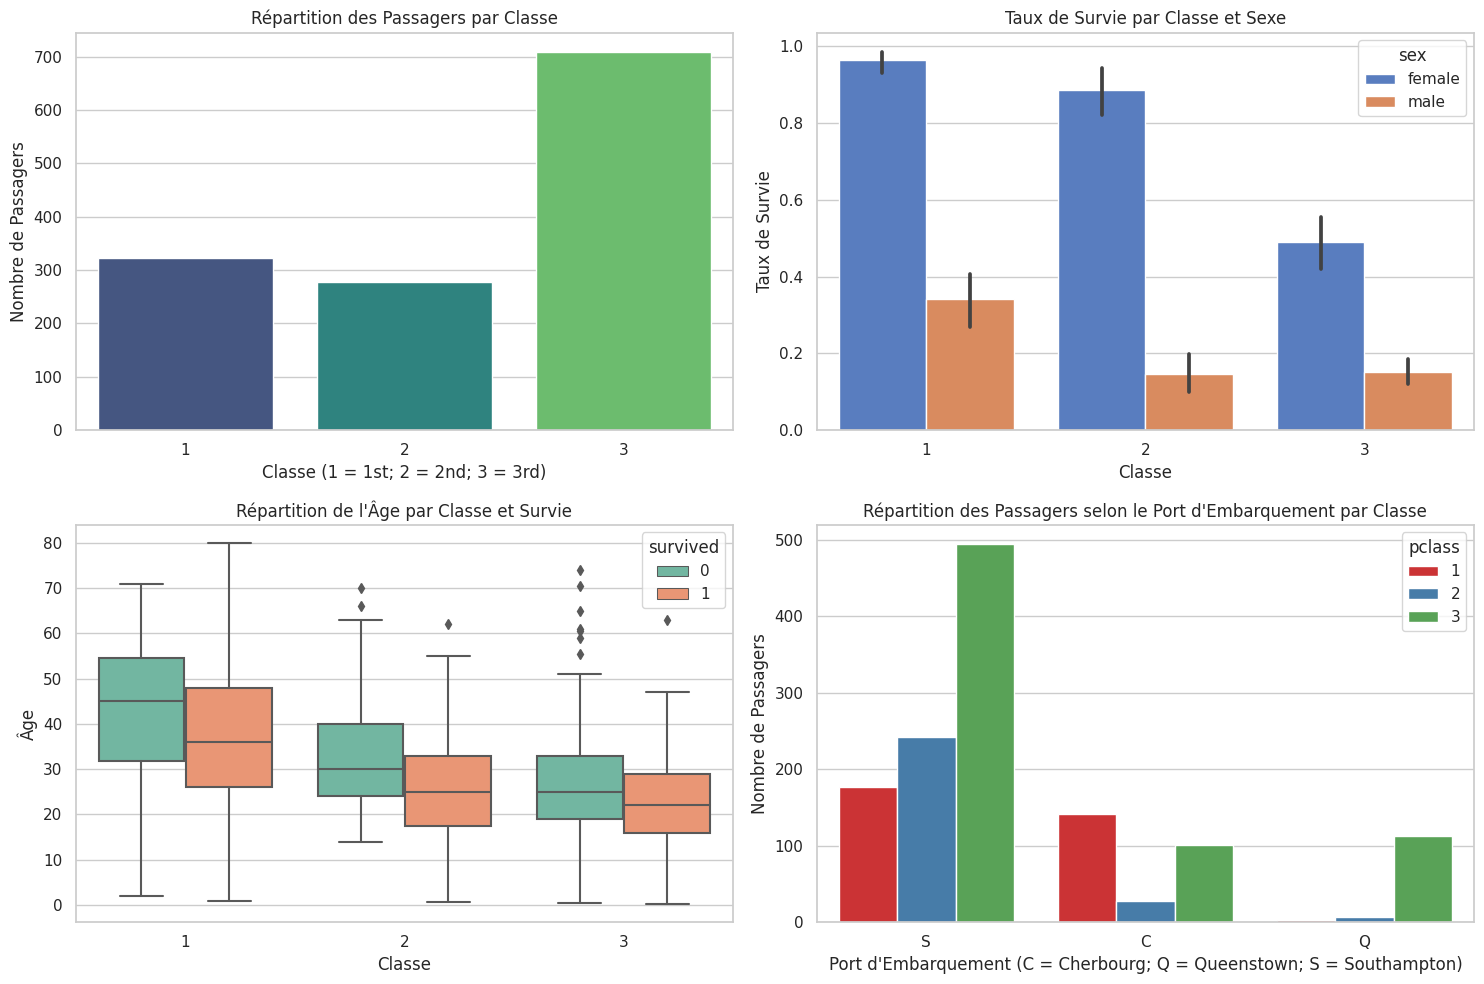

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramme de la répartition des passagers selon la classe (pclass)
sns.countplot(x='pclass', data=df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Répartition des Passagers par Classe")
axes[0, 0].set_xlabel("Classe (1 = 1st; 2 = 2nd; 3 = 3rd)")
axes[0, 0].set_ylabel("Nombre de Passagers")

# 2. Diagramme en barres du taux de survie par classe et sexe
sns.barplot(x='pclass', y='survived', hue='sex', data=df, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title("Taux de Survie par Classe et Sexe")
axes[0, 1].set_xlabel("Classe")
axes[0, 1].set_ylabel("Taux de Survie")

# 3. Boxplot de l'âge par classe et survie
sns.boxplot(x='pclass', y='age', hue='survived', data=df, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title("Répartition de l'Âge par Classe et Survie")
axes[1, 0].set_xlabel("Classe")
axes[1, 0].set_ylabel("Âge")

# 4. Répartition des passagers selon le port d'embarquement par classe
sns.countplot(x='embarked', hue='pclass', data=df, palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title("Répartition des Passagers selon le Port d'Embarquement par Classe")
axes[1, 1].set_xlabel("Port d'Embarquement (C = Cherbourg; Q = Queenstown; S = Southampton)")
axes[1, 1].set_ylabel("Nombre de Passagers")

# Ajuster l'espacement entre les sous-graphiques pour éviter le chevauchement
plt.tight_layout()
plt.show()

# Etape 1 : Visualisation du jeu de données

### 1. Distribution de la variable cible (les classes sont bien équilibrées!?) Survival (0 = No; 1 = Yes)

In [ ]:
survived = df['survived'].eq(1).sum()
notsurvived = df['survived'].eq(0).sum()

### 2. Relation entre pclass et survived or not

In [ ]:
df.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

In [ ]:
grouped_df = df[['pclass', 'survived']].groupby('pclass')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

     pclass  survived
0         1         1
1         1         1
2         1         0
3         1         0
4         1         0
..      ...       ...
318       1         0
319       1         1
320       1         1
321       1         0
322       1         1

[323 rows x 2 columns] 


     pclass  survived
323       2         0
324       2         1
325       2         0
326       2         0
327       2         0
..      ...       ...
595       2         0
596       2         1
597       2         1
598       2         1
599       2         0

[277 rows x 2 columns] 


      pclass  survived
600        3         0
601        3         0
602        3         0
603        3         1
604        3         1
...      ...       ...
1304       3         0
1305       3         0
1306       3         0
1307       3         0
1308       3         0

[709 rows x 2 columns] 




In [ ]:
grouped_df.count()

,survived
pclass,
1,323
2,277
3,709


Text(0, 0.5, 'Survival Probability')

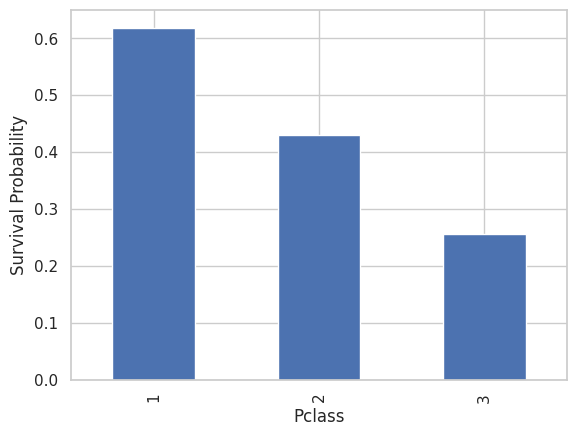

In [ ]:
plt = df[['pclass', 'survived']].groupby('pclass').mean().survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

*Les passagers de la classe 1 ont plus de chance pour survivre plus que 60%,
Les passagers de la classe 3 ont moins de chance pour survivre moins que 30%,*

### 3. Distribution de la variable sexe

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='sex', title='Distribution du Sexe des Passagers', color='sex',
                   labels={'sex': 'Sexe'},
                   category_orders={'sex': ['male', 'female']},  # Ordre d'affichage
                   color_discrete_sequence=['#636EFA', '#EF553B'])  # Couleurs personnalisées





In [ ]:
# Personnalisation de l'apparence
fig.update_layout(
    xaxis_title="Sexe",
    yaxis_title="Nombre de Passagers",
    template='plotly_white'
)
fig.show()

### 4. Distribution de la variable sibsp (nbr de frère et soeur/ conjoint à board)

> Add blockquote



In [ ]:
fig = px.histogram(df, x='sibsp', title='Distribution du Nombre de Frères/Sœurs ou Conjoints à Bord',
                   labels={'sibsp': 'Nombre de Frères/Sœurs ou Conjoints à Bord'},
                   color_discrete_sequence=['#FFA07A'])

fig.update_layout(
    xaxis_title="Nombre de Frères/Sœurs ou Conjoints à Bord",
    yaxis_title="Nombre de Passagers",
    template='plotly_white'
)

### 5. Distribution de la variable Parch - Children/Parents

In [ ]:
fig = px.histogram(df, x='parch', title=' Distribution de nombre Parents/Fils à Bord',
                   labels={'parch': 'Nombre Parents/Fils à Bord'},
                   color_discrete_sequence=['#FFA07A'])

fig.update_layout(
    xaxis_title="Nombre Parents/Fils à Bord",
    yaxis_title="Nombre de Passagers",
    template='plotly_white'
)

<table>
    <tr>
        <td style='width:5%;'>
            <img src='img/natural-language-processing-guide.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 16px;font-weight: 600;line-height: 24px;'>
                Etape 2: Transformation
            </div>
            <span>Transformation des valeur qualitatives.</span>
        </td>
        <td ></td>
    </tr>
</table>

### 1. Convertir les variables qualitatives en quantitatives

In [ ]:
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2})

*Garder seulement le titre de chaque passager (les caractères qui précèdent le .)*

In [ ]:
tt = df.name.str.extract('( [A-Za-z]+)\.', expand=False)

In [ ]:
df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,2.0,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,2.0,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,2.0,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,2.0,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,2.0,Mrs


In [ ]:
# supprimer la colonne "name"
df=df.drop('name',axis=1)

<Axes: xlabel='title'>

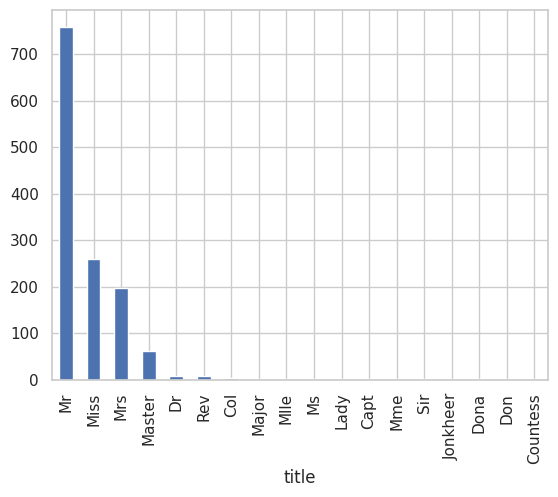

In [ ]:
df.title.value_counts().plot(kind='bar')

In [ ]:
df['title'] = df['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

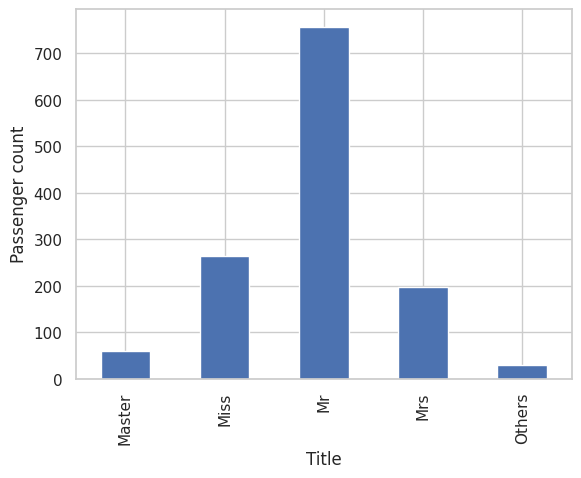

In [ ]:
plt = df.title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

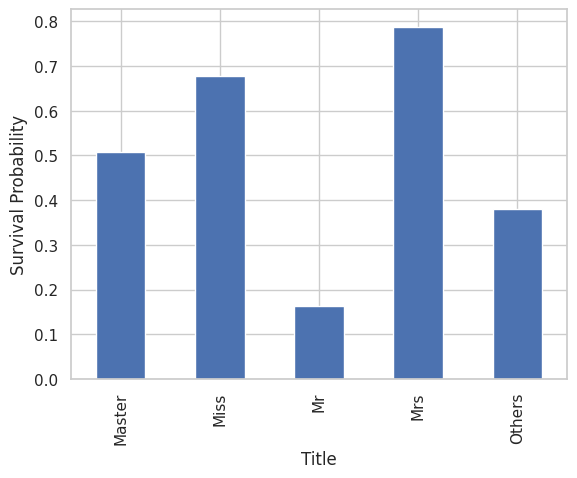

In [ ]:
plt = df[['title', 'survived']].groupby('title').mean().survived.plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

### 2. Convertir la variable "title" en variable quantitative

> Add blockquote



In [ ]:
l = list(df['title'].values)

unique_titles = list(set(l))
n=len(unique_titles)
m={}
k=0
for i in unique_titles:
  m[i]=k
  k+=1


In [ ]:
df['title']=df['title'].map(m)

In [ ]:
df[:5]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,1,29.0000,0,0,24160,211.3375,B5,2.0,0
1,1,1,0,0.9167,1,2,113781,151.5500,C22 C26,2.0,2
2,1,0,1,2.0000,1,2,113781,151.5500,C22 C26,2.0,0
3,1,0,0,30.0000,1,2,113781,151.5500,C22 C26,2.0,4
4,1,0,1,25.0000,1,2,113781,151.5500,C22 C26,2.0,1


In [ ]:
# one hot encode title feature
from sklearn.preprocessing import OneHotEncoder

# Créer l'objet OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Appliquer l'encodage One-Hot sur la colonne 'title'
title_encoded = encoder.fit_transform(df[['title']])

# Créer un DataFrame avec les nouvelles colonnes encodées
title_encoded_df = pd.DataFrame(title_encoded, columns=encoder.get_feature_names_out(['title']))

# Ajouter ces nouvelles colonnes au DataFrame original
title_encoded_df.head()

,title_1,title_2,title_3,title_4
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [ ]:
df = pd.concat([df, title_encoded_df], axis=1)


# Afficher les premières lignes du nouveau DataFrame pour vérifier
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,title_1,title_2,title_3,title_4
0,1,1,1,29.0000,0,0,24160,211.3375,B5,2.0,0,0.0,0.0,0.0,0.0
1,1,1,0,0.9167,1,2,113781,151.5500,C22 C26,2.0,2,0.0,1.0,0.0,0.0
2,1,0,1,2.0000,1,2,113781,151.5500,C22 C26,2.0,0,0.0,0.0,0.0,0.0
3,1,0,0,30.0000,1,2,113781,151.5500,C22 C26,2.0,4,0.0,0.0,0.0,1.0
4,1,0,1,25.0000,1,2,113781,151.5500,C22 C26,2.0,1,1.0,0.0,0.0,0.0


In [ ]:
df=df.drop('title',axis=1)

<table>
    <tr>
        <td style='width:5%;'>
            <img src='img/intro-to-game-ai-and-reinforcement-learning.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 16px;font-weight: 600;line-height: 24px;'>
                Etape 3: Données manquantes
            </div>
            <span>Les techniques d'imputation des valeurs manquantes.</span>
        </td>
        <td ></td>
    </tr>
</table>

### 1. Vérifier que la colonne age contient des valeurs manquantes:</br>
<span style='font-size: 13px;'>On peut calculer le nombre de valeurs manquantes au niveau de chaque attribut: ça nous aide à comparer le nombre de valeurs manquante par rapport à la taille du jeu de données</span>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   float64
 10  title_1   1309 non-null   float64
 11  title_2   1309 non-null   float64
 12  title_3   1309 non-null   float64
 13  title_4   1309 non-null   float64
dtypes: float64(7), int64(5), object(2)
memory usage: 143.3+ KB


In [ ]:
# utiliser la méthode isnull()
nbr_null_values = df['age'].isnull().sum()
print("Le nombre de valeurs manquante au niveau de l'attribut age: ",nbr_null_values)
print("Le nombre total de valeurs:",len(df))

Le nombre de valeurs manquante au niveau de l'attribut age:  263
Le nombre total de valeurs: 1309


## Stratégie d'imputation:<br>
### 1. La colonne cabin contient 1014 valeurs manquante d'un totale de 1309 valeurs ==> supprimer la colonne

Utiliser la méthode drop()
syntaxe1 : data_frame = data_frame.drop(["nom_colonne", axis=1])
syntaxe2 : data_frame = data_frame.drop(columns=['nom_colonne'])

In [ ]:
df = df.drop(columns=['cabin'])

### 2. Remplacer les valeurs manquantes de la colonne embarked par la valeur la plus redendante
* la méthode fillna() remplace les valeurs NaN par ce q'on lui demande*

In [ ]:
most_frequent_embarked = df['embarked'].value_counts().idxmax()
df['embarked'] = df['embarked'].fillna(most_frequent_embarked)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   embarked  1309 non-null   float64
 9   title_1   1309 non-null   float64
 10  title_2   1309 non-null   float64
 11  title_3   1309 non-null   float64
 12  title_4   1309 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 133.1+ KB


### 3. Remplacer les valeurs manquantes de la colonne fare par la valeur moyenne

In [ ]:
df['fare']=df['fare'].fillna(df['fare'].mean())

### 4. Remplacer les valeurs manquantes de la colonne age par la valeur médiane

In [ ]:
df['age']=df['age'].fillna(df['age'].median())

### 5. Afficher la matrice de corrélation ('pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'embarked', 'fare')

In [ ]:
columns_of_interest = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

# Calculer la matrice de corrélation
correlation_matrix = df[columns_of_interest].corr()

# Convertir la matrice de corrélation en DataFrame pour Plotly
corr_df = pd.DataFrame(correlation_matrix)

# Créer un heatmap avec Plotly
fig = px.imshow(corr_df,
                color_continuous_scale='RdBu',
                title='Matrice de Corrélation',
                labels=dict(x='Variables', y='Variables', color='Corrélation'),
                x=columns_of_interest,
                y=columns_of_interest)

# Afficher le graphique
fig.show()

<table>
    <tr>
        <td style='width:5%;'>
            <img src='img/feature-engineering.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 16px;font-weight: 600;line-height: 24px;'>
                Etape 4: Ingénierie des attributs
            </div>
            <span>Génerer des attributs à travers des combinaisons entre les caractéristiques.</span>
        </td>
        <td ></td>
    </tr>
</table>

In [ ]:
df['familysize'] = df.sibsp + df.parch + 1

# Modélisation


## 1. Splitting dataset into train and test sets 80%  :20%

---



In [ ]:
from sklearn.model_selection import train_test_split

# Supposons que df soit votre DataFrame principal et que 'target' soit la colonne cible
X = df.drop(['survived','ticket'], axis=1)  # Sélectionne toutes les colonnes sauf la cible




In [ ]:
y = df['survived']  # Colonne cible

# Diviser le jeu de données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles d'entraînement et de test
print(f"Taille de X_train: {X_train.shape}")
print(f"Taille de X_test: {X_test.shape}")
print(f"Taille de y_train: {y_train.shape}")
print(f"Taille de y_test: {y_test.shape}")

Taille de X_train: (1047, 12)
Taille de X_test: (262, 12)
Taille de y_train: (1047,)
Taille de y_test: (262,)


## 2. Feature scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   sex         1309 non-null   int64  
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   object 
 7   fare        1309 non-null   float64
 8   embarked    1309 non-null   float64
 9   title_1     1309 non-null   float64
 10  title_2     1309 non-null   float64
 11  title_3     1309 non-null   float64
 12  title_4     1309 non-null   float64
 13  familysize  1309 non-null   int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 143.3+ KB


In [ ]:
# Affiche le nombre de valeurs NaN par colonne
print(df.isnull().sum())

pclass        0
survived      0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
title_1       0
title_2       0
title_3       0
title_4       0
familysize    0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Standardisation
scaler = StandardScaler()

# Appliquer la standardisation sur l'ensemble d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la même transformation sur l'ensemble de test
X_test_scaled = scaler.transform(X_test)

print("Aperçu des données standardisées :")
print(f"X_train_scaled:\n{X_train_scaled[:5]}")
print(f"X_test_scaled:\n{X_test_scaled[:5]}")

Aperçu des données standardisées :
X_train_scaled:
[[ 0.84035898 -0.73927586 -0.9565684  -0.4959643  -0.44243194 -0.49557686
   0.61403205 -0.41527389 -0.22394296 -0.15957829  0.85641328 -0.57116167]
 [-0.35509734 -0.73927586  0.52955095 -0.4959643  -0.44243194 -0.44526407
   0.61403205 -0.41527389 -0.22394296 -0.15957829  0.85641328 -0.57116167]
 [-1.55055366  1.35267503 -0.8783516  -0.4959643   1.79537599  0.89070441
   0.61403205 -0.41527389 -0.22394296 -0.15957829 -1.16766055  0.67598383]
 [-1.55055366 -0.73927586  1.38993584  0.45683317 -0.44243194  3.74762906
  -1.86817473 -0.41527389 -0.22394296  6.26651664 -1.16766055  0.05241108]
 [-1.55055366 -0.73927586 -0.09618352 -0.4959643  -0.44243194  0.17103954
   0.61403205 -0.41527389 -0.22394296 -0.15957829  0.85641328 -0.57116167]]
X_test_scaled:
[[ 0.84035898 -0.73927586  0.45133414 -0.4959643  -0.44243194 -0.51046861
   0.61403205 -0.41527389 -0.22394296 -0.15957829  0.85641328 -0.57116167]
 [ 0.84035898 -0.73927586 -0.72191798  

## 3. k Nearest Neighbors

#### 3.1.Entrainer et tester le modèle

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


#### 3.2. Afficher la matrice de confusion et les métriques

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7709923664122137
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.78      0.77      0.77       262

Confusion Matrix:
 [[126  18]
 [ 42  76]]


In [ ]:
Image('metrics.png')

FileNotFoundError: No such file or directory: 'metrics.png'

FileNotFoundError: No such file or directory: 'metrics.png'

<IPython.core.display.Image object>

#### 3.3 Appliquer GridSearch

In [ ]:
Image('grid.png')

FileNotFoundError: No such file or directory: 'grid.png'

FileNotFoundError: No such file or directory: 'grid.png'

<IPython.core.display.Image object>

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
}



In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski',
                                         'chebyshev'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy score: ", grid_search.best_score_)

Best parameters found:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 13, 'knn__weights': 'uniform'}
Best cross-validation accuracy score:  0.8175393028024607


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19,algorithm='auto',leaf_size=10,p=3,metric='minkowski',weights='uniform')
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7786259541984732
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       144
           1       0.84      0.63      0.72       118

    accuracy                           0.78       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.79      0.78      0.77       262

Confusion Matrix:
 [[130  14]
 [ 44  74]]


In [ ]:
X_train[0].shape

## 4. Decison Tree

#### 4.1 Appliquer GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = {
    'clf__max_depth': [3, 5, 7, 9],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [2, 4, 6, 8, 10],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 7, 9],
                         'clf__min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy score: ", grid_search.best_score_)

Best parameters found:  {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 6}
Best cross-validation accuracy score:  0.8223103212576897


#### 4.2 Entreiner et tester le modèle

In [ ]:
clf = grid_search.best_estimator_

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)




#### 4.3 Afficher les résultats

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7786259541984732
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       144
           1       0.80      0.68      0.73       118

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

Confusion Matrix:
 [[124  20]
 [ 38  80]]


In [ ]:
Image('decision.png')

## 5. Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

param_grid = {
    'clf__n_estimators': [50,100,150],
    'clf__max_depth': [3, 5, 7, 9, 11],
    'clf__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 7, 9, 11],
                         'clf__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
clf = grid_search.best_estimator_

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7862595419847328
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       144
           1       0.82      0.68      0.74       118

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.78       262

Confusion Matrix:
 [[126  18]
 [ 38  80]]


In [ ]:
Image('random_forest.png')

## 6. Support vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3, 4]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

svm = grid_search.best_estimator_

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7824427480916031
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       144
           1       0.80      0.69      0.74       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.78       262
weighted avg       0.78      0.78      0.78       262

Confusion Matrix:
 [[124  20]
 [ 37  81]]


In [ ]:
Image('kernel_svm.png')

## 7. Receiver Operating Characteristic (ROC) Curve

In [ ]:
Image(filename='roc.png')

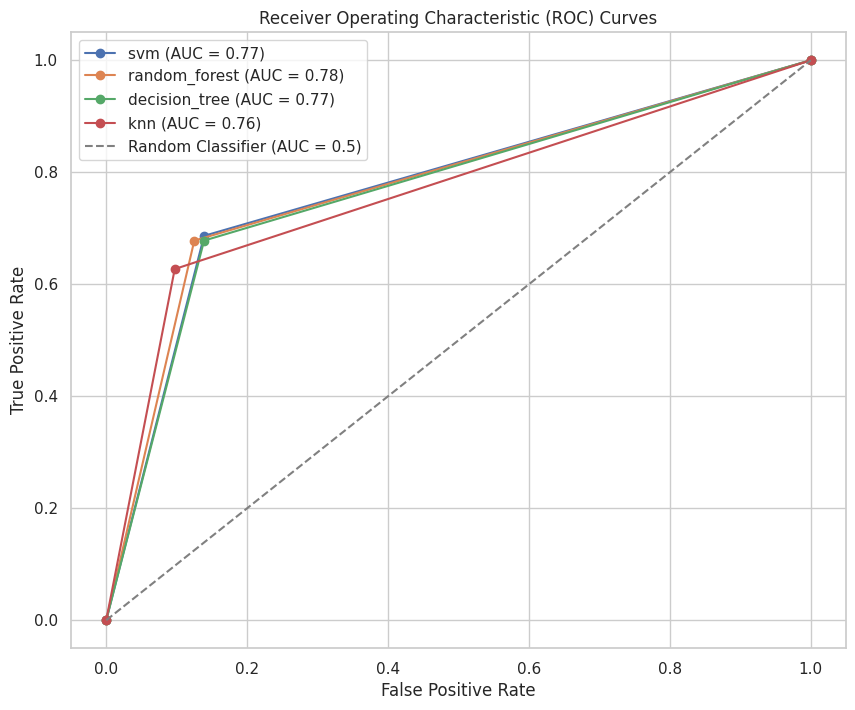

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

confusion_matrices = {
    'svm': np.array([[124, 20], [37, 81]]),
    'random_forest': np.array([[126, 18], [38, 80]]),
    'decision_tree': np.array([[124, 20], [38, 80]]),
    'knn': np.array([[130, 14], [44, 74]])
}

roc_data = {}
for model_name, cm in confusion_matrices.items():
    tp = cm[1, 1]  # True Positives
    fn = cm[1, 0]  # False Negatives
    fp = cm[0, 1]  # False Positives
    tn = cm[0, 0]  # True Negatives

    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    roc_data[model_name] = (fpr, tpr)

plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_data.items():
    plt.plot([0, fpr, 1], [0, tpr, 1], marker='o', linestyle='-', label=f'{model_name} (AUC = {round(auc([0, fpr, 1], [0, tpr, 1]), 2)})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.show()
